In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/raisin-binary-classification/Raisin_Dataset.xlsx
/kaggle/input/raisin-binary-classification/Raisin_Dataset.csv


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Example DataFrame creation
# Replace this with your actual dataset
data = {
    'YearsExperience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'AboveThreshold': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # Binary target variable
}
df = pd.DataFrame(data)

# Split the dataset into features and target variable
X = df[['YearsExperience']]
y = df['AboveThreshold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [85]:
df = pd.read_csv('/kaggle/input/raisin-binary-classification/Raisin_Dataset.csv')
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


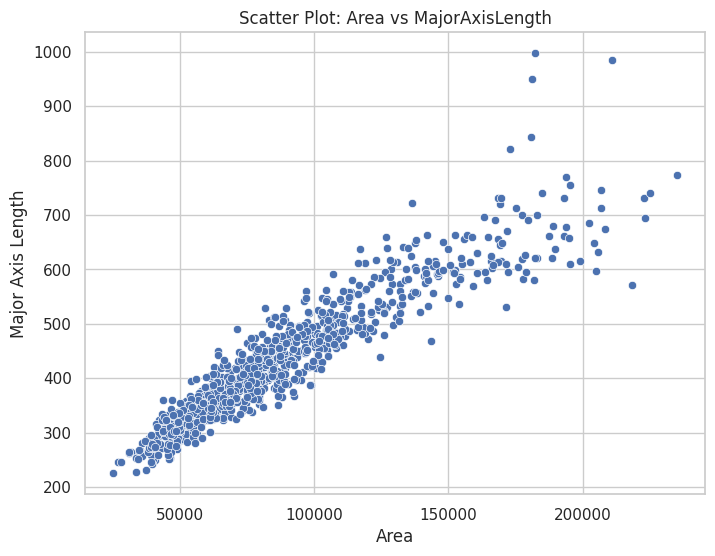

In [81]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Scatter plot for Area vs MajorAxisLength
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='MajorAxisLength', data=df)
plt.title('Scatter Plot: Area vs MajorAxisLength')
plt.xlabel('Area')
plt.ylabel('Major Axis Length')
plt.show()

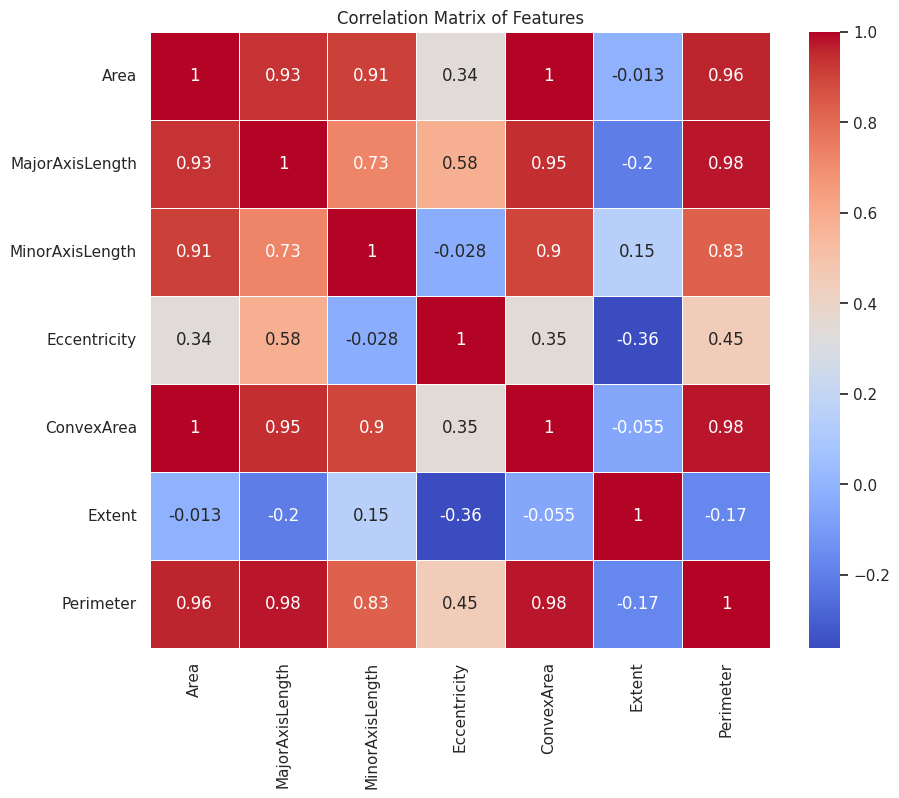

In [82]:
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

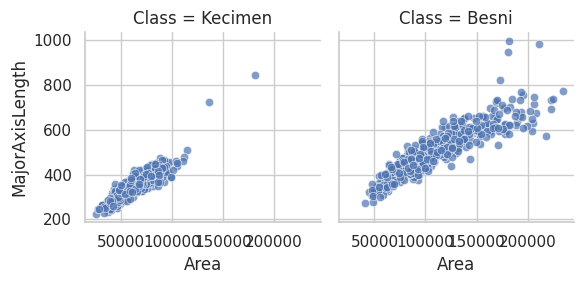

In [86]:
g = sns.FacetGrid(df, col="Class")
g.map(sns.scatterplot, 'Area', 'MajorAxisLength', alpha=.7)
plt.show()

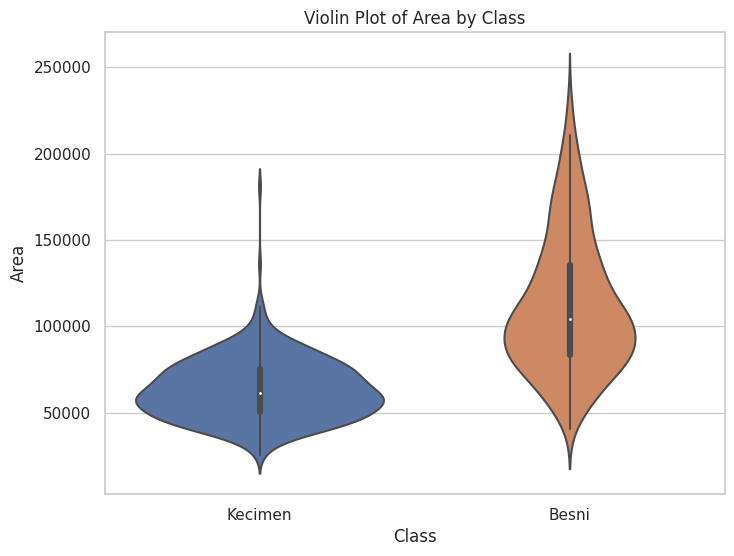

In [89]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Class', y='Area', data=df)
plt.title('Violin Plot of Area by Class')
plt.show()

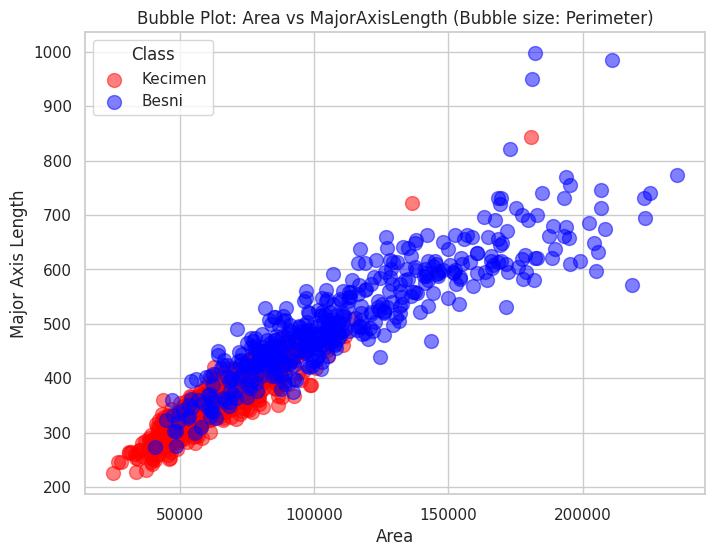

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the colors for each class
class_colors = {
    'Kecimen': 'red',
    'Besni' : 'blue'
    # Add more classes and their corresponding colors here
}

# Create a figure
plt.figure(figsize=(8, 6))

# Scatter plot with class differentiation
for class_name, color in class_colors.items():
    # Filter data for each class
    class_data = df[df['Class'] == class_name]
    plt.scatter(class_data['Area'], class_data['MajorAxisLength'], 
                s=100,  # Bubble size based on Perimeter
                alpha=0.5, color=color, label=class_name)  # Use different colors for each class

# Adding title and labels
plt.title('Bubble Plot: Area vs MajorAxisLength (Bubble size: Perimeter)')
plt.xlabel('Area')
plt.ylabel('Major Axis Length')

# Add a legend to differentiate classes
plt.legend(title='Class')

# Show the plot
plt.show()


In [4]:
df.shape

(900, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
df.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
#lets see the count of the classes
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [10]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [15]:
y = df['Class'] 
y


0      Kecimen
1      Kecimen
2      Kecimen
3      Kecimen
4      Kecimen
        ...   
895      Besni
896      Besni
897      Besni
898      Besni
899      Besni
Name: Class, Length: 900, dtype: object

In [16]:
df.drop('Class', axis='columns', inplace=True)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [68]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-1.06892739 -1.03929902 -1.24102733 ... -1.05995025 -0.81416989
  -1.15337222]
 [-0.50571382 -0.31719017 -0.53037138 ... -0.48392171 -0.64368608
  -0.24711562]
 [ 1.29195742  1.43911445  0.86123558 ...  1.2526291   0.90894512
   1.25436545]
 ...
 [ 2.03313245  1.5185808   1.91858536 ...  1.91461404  0.99670442
   1.48530866]
 [-1.5379109  -1.60137186 -2.1008623  ... -1.49962479 -1.4222079
  -1.76537611]
 [-0.77457775 -1.04577573 -0.26419641 ... -0.79489542  0.20091587
  -0.93058891]]


In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)


array(['Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Besni

In [20]:
y_test

236    Kecimen
40     Kecimen
546      Besni
368    Kecimen
868      Besni
        ...   
378    Kecimen
582      Besni
587      Besni
509      Besni
663      Besni
Name: Class, Length: 180, dtype: object

In [60]:
model.score(X_test, y_test)

0.8444444444444444

In [57]:
regularized_model = LogisticRegression(penalty='l2',C=1.0)
regularized_model.fit(X_train, y_train)
regularized_model.score(X_test, y_test)

0.8444444444444444

# Lets try some techniques to find the good hyperparameter 

In [69]:
#after evaluating the model it gives 82 as the accuracy with best parameter
#so lemme try more non linear curve here using higher degree
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [70]:

# Step 4: Set up the Grid Search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(penalty='l2',max_iter=1000), param_grid, cv=5)

# Step 5: Fit the model
grid.fit(X_poly, y_train)

# Step 6: Get the best model and accuracy
best_model = grid.best_estimator_
accuracy = best_model.score(X_test_poly, y_test)

# Step 7: Print results
print("Test accuracy with best parameter: ", accuracy)
print("Best parameter value : ", grid.best_params_)

Test accuracy with best parameter:  0.8444444444444444
Best parameter value :  {'C': 0.01}


# Lets try Random Forest Approach

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
#lets use unscaled values , as rf doesn't require that to be in scaled format 
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [79]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for random forest : ", accuracy)

# Print a classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy for random forest :  0.8222222222222222
Classification Report:
               precision    recall  f1-score   support

       Besni       0.78      0.86      0.82        42
     Kecimen       0.86      0.79      0.83        48

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90

Confusion Matrix:
 [[36  6]
 [10 38]]


# lets try naive bayes approach i am much interested

In [80]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
gnb = GaussianNB()
# Fit the model
gnb.fit(X_train, y_train)
# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 80.00%


> Thanking for coming this far, i only know these models, so i tried this, and i learnt a lot new that grid search is one among, don't worry i didn't typed all of this, there is no need also, concept is important, i used chatgpt help to solve my doubts..will come with more best models in future , have a nice day